# Assignment 8: Explain the relationship between the allotted weights of the portfolio assets and the correlation of those assets with other assets in the portfolio.
The assignment requires us to generate a portfolio of 10-15 stocks, optimise it and analyse why certain assets in the portfolio have higher weights in comparison to other assets.  
The portfolio of stocks should be Long only, i.e. the portfolio only buys an asset and doesn't take any short positions.  

The tasks given in the assignment are:
> **Task 1:** Identify any "counterintuitive" weight allocations obtained while minimising the risk of your portfolio.

> **Task 2:** Without looking at the correlations of the securities, comment on what you expect the correlations of "counterintuitive" stocks to be relative to the alternatives.

> **Task 3:** Create a correlation matrix which displays the correlations across all the securities you're working with. Modify the correlation matrix so it only displays data in the lower diagonal, with all values rounded off to 2 decimal places.

> **Task 4:** Explore the correlations of the "counterintuitive" stocks against all other securities. Compare those correlations to those of the "alternative" securities.

> **Task 5:** For each of the "counterintuitive" weight allocations you listed in Task 1, explain why those seemingly counterintuitive results are actually very intuitive. Explain why those weights were allocated; so why riskier stocks were chosen over less risky stocks when minimising the risk of the portfolio.  
Explain why more money was invested in one stock over the other, despite both stocks being approximately equally risky.

I decided to generate a portfolio of 10 stocks from the 'Hospitality sector' in India. Stocks are listed on the National Stock Exchange of India, Mumbai (except for '*Sayaji Hotels*' which is listed on the BSE, Mumbai). The companies in the portfolio required to have at least 5 years of price data (i.e. companies that were listed since August, 2017) The companies I chose are:

1. Indian Hotels Company Limited (INDHOTEL)
2. Oriental Hotels Limited (ORIENTHOT)
3. Sayaji Hotels Limited (SAYAJIHOTL)
4. Jubilant FoodWorks Limited (JUBLFOOD)
5. EIH Limited (EIHOTEL)
6. Speciality Restaurants Limited (SPECIALITY)
7. Royal Orchid Hotels Limited (ROHLTD)
8. Wonderla Holidays Limited (WONDERLA)
9. HLV Limited (HLVLTD)
10. BLS International Services Limited (BLS)
  
Price data for these stocks were obtained from *Yahoo Finance*. The price data pertains to the period from 5th August, 2017 to 4th August, 2022 (a 5-year period).

As an extra, we will be using 'NIFTY MICROCAP 250', a benchmark index of 250 Indian companies listed on the NSE India, which are beyond the NIFTY 500 list of companies (Comapnies ranked *501<sup>st</sup> to 750<sup>th</sup>* as per market capitalisation on NSE), as a representation for the market these portfolio stocks represent. Data for MICROCAP 250 was obtained from *NSE Indices* website.

The reason for choosing MICROCAP 250 instead of the usual 'NIFTY 50' from the NSE is because none of the stocks in the portfolio are in the NIFTY 50 basket of stocks. Also, more than half of the stocks in the portfolio would be considered as '*Small-Caps*' in market parlence.

In [1]:
# We start by importing the important libraries in Python

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing price data of the assets in the portfolio

indhotel = pd.read_csv('INDHOTEL.NS.csv')
orienthot = pd.read_csv('ORIENTHOT.NS.csv')
sayajihotl = pd.read_csv('SAYAJIHOTL.BO.csv')
jublfood = pd.read_csv('JUBLFOOD.NS.csv')
eihotel = pd.read_csv('EIHOTEL.NS.csv')
speciality = pd.read_csv('SPECIALITY.NS.csv')
rohltd = pd.read_csv('ROHLTD.NS.csv')
wonderla = pd.read_csv('WONDERLA.NS.csv')
hlvltd = pd.read_csv('HLVLTD.NS.csv')
bls = pd.read_csv('BLS.NS.csv')

In [3]:
# Creating a dataframe with the price data

df = indhotel['Date']
df = df.to_frame()
df['INDHOTEL'] = indhotel['Adj Close']
df['ORIENTHOT'] = orienthot['Adj Close']
df['SAYAJIHOTL'] = sayajihotl['Adj Close']
df['JUBLFOOD'] = jublfood['Adj Close']
df['EIHOTEL'] = eihotel['Adj Close']
df['SPECIALITY'] = speciality['Adj Close']
df['ROHLTD'] = rohltd['Adj Close']
df['WONDERLA'] = wonderla['Adj Close']
df['HLVLTD'] = hlvltd['Adj Close']
df['BLS'] = bls['Adj Close']
df.rename(columns = {'Date' : 'date'}, inplace = True)
df.set_index('date', inplace = True)
df

,INDHOTEL,ORIENTHOT,SAYAJIHOTL,JUBLFOOD,EIHOTEL,SPECIALITY,ROHLTD,WONDERLA,HLVLTD,BLS
date,,,,,,,,,,
2017-08-07,118.398842,34.819897,248.500000,124.582672,128.122437,118.650002,110.201439,340.265076,23.750000,89.706154
2017-08-08,119.224564,33.940849,248.500000,131.109573,129.979980,124.650002,108.611290,336.689545,21.950001,85.210144
2017-08-09,115.738197,33.012974,248.000000,127.996368,128.366852,120.800003,105.479202,338.061005,21.450001,87.517609
2017-08-10,114.453751,32.964138,248.000000,129.843628,128.317978,117.150002,101.913437,333.505829,20.700001,85.257706
2017-08-11,112.604057,32.036255,248.000000,127.740234,128.415741,112.449997,101.865250,330.518066,20.549999,85.543190
...,...,...,...,...,...,...,...,...,...,...
2022-07-29,262.850006,62.900002,232.000000,550.250000,151.149994,186.800003,169.100006,240.449997,9.350000,241.600006
2022-08-01,270.450012,63.400002,236.550003,559.650024,149.399994,188.500000,173.850006,245.800003,9.400000,240.000000
2022-08-02,268.450012,66.050003,247.050003,565.900024,153.899994,188.100006,171.600006,238.250000,9.800000,241.100006


In [4]:
# Calculating daily returns (or percentage change) of the stocks

df_returns = df.pct_change(1).dropna()
df_returns

,INDHOTEL,ORIENTHOT,SAYAJIHOTL,JUBLFOOD,EIHOTEL,SPECIALITY,ROHLTD,WONDERLA,HLVLTD,BLS
date,,,,,,,,,,
2017-08-08,0.006974,-0.025246,0.000000,0.052390,0.014498,0.050569,-0.014429,-0.010508,-0.075789,-0.050119
2017-08-09,-0.029242,-0.027338,-0.002012,-0.023745,-0.012411,-0.030886,-0.028838,0.004073,-0.022779,0.027080
2017-08-10,-0.011098,-0.001479,0.000000,0.014432,-0.000381,-0.030215,-0.033805,-0.013474,-0.034965,-0.025822
2017-08-11,-0.016161,-0.028148,0.000000,-0.016199,0.000762,-0.040120,-0.000473,-0.008959,-0.007246,0.003348
2017-08-14,0.021650,0.027439,0.000000,0.057149,-0.007994,-0.002223,0.022706,0.005483,0.017032,-0.000835
...,...,...,...,...,...,...,...,...,...,...
2022-07-29,-0.001140,-0.027069,0.015540,-0.026881,-0.009502,0.168596,0.011364,0.018640,0.038889,0.015766
2022-08-01,0.028914,0.007949,0.019612,0.017083,-0.011578,0.009101,0.028090,0.022250,0.005348,-0.006623
2022-08-02,-0.007395,0.041798,0.044388,0.011168,0.030120,-0.002122,-0.012942,-0.030716,0.042553,0.004583


In [5]:
# 5-year average annualised return of each stock
# assuming there are 250 trading days in a year

stock_returns = (1 + df_returns.mean()) ** 250 - 1
stock_returns

INDHOTEL      0.281628
ORIENTHOT     0.281471
SAYAJIHOTL    0.099728
JUBLFOOD      0.462523
EIHOTEL       0.132631
SPECIALITY    0.285300
ROHLTD        0.294658
WONDERLA      0.008885
HLVLTD       -0.026207
BLS           0.438118
dtype: float64

In [6]:
# 5-year annualised risk (volatility) of each stock

df_returns.std(ddof=1) * np.sqrt(250)

INDHOTEL      0.403586
ORIENTHOT     0.486158
SAYAJIHOTL    0.453728
JUBLFOOD      0.382512
EIHOTEL       0.421395
SPECIALITY    0.557594
ROHLTD        0.570942
WONDERLA      0.344446
HLVLTD        0.576816
BLS           0.582517
dtype: float64

In [7]:
# Generating a covariance matrix of stock returns

vcv_matrix = df_returns.cov(ddof=1)*
vcv_matrix

,INDHOTEL,ORIENTHOT,SAYAJIHOTL,JUBLFOOD,EIHOTEL,SPECIALITY,ROHLTD,WONDERLA,HLVLTD,BLS
INDHOTEL,0.000652,0.000285,0.000053,0.000198,0.000327,0.000255,0.000356,0.000175,0.000209,0.000173
ORIENTHOT,0.000285,0.000945,0.000100,0.000104,0.000302,0.000304,0.000416,0.000139,0.000301,0.000217
SAYAJIHOTL,0.000053,0.000100,0.000823,0.000043,0.000083,0.000161,0.000100,0.000046,0.000125,0.000117
JUBLFOOD,0.000198,0.000104,0.000043,0.000585,0.000173,0.000164,0.000188,0.000119,0.000109,0.000131
EIHOTEL,0.000327,0.000302,0.000083,0.000173,0.000710,0.000275,0.000411,0.000173,0.000253,0.000183
SPECIALITY,0.000255,0.000304,0.000161,0.000164,0.000275,0.001244,0.000399,0.000200,0.000290,0.000294
ROHLTD,0.000356,0.000416,0.000100,0.000188,0.000411,0.000399,0.001304,0.000232,0.000376,0.000282
WONDERLA,0.000175,0.000139,0.000046,0.000119,0.000173,0.000200,0.000232,0.000475,0.000132,0.000183
HLVLTD,0.000209,0.000301,0.000125,0.000109,0.000253,0.000290,0.000376,0.000132,0.001331,0.000285
BLS,0.000173,0.000217,0.000117,0.000131,0.000183,0.000294,0.000282,0.000183,0.000285,0.001357


In [8]:
# Generating an array (or a vector) of equal weights to be used as inputs in the 'minimize' function

num_stocks = len(df.columns)
initial_weights = [1 / num_stocks] * num_stocks
initial_weights

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [9]:
# Developing a function for generating annualised portfolio returns using 'weights' as an input

def getPortReturn(weights):
    port_return = np.dot(np.transpose(weights), stock_returns)
    
    return port_return

In [10]:
# Calculating portfolio return using the initial weights

getPortReturn(initial_weights)

0.2258735153889861

In [11]:
# Developing a function for calculating the portfolio risk using 'weights' as an input

def getPortRisk(weights):
    port_risk = np.sqrt(np.dot(np.transpose(weights), np.dot(vcv_matrix, weights)) * 250)
    
    return port_risk

In [12]:
# Calculating annualised standard deviation of the portfolio (Portfolio risk)

getPortRisk(initial_weights)

0.26606013662556854

In [13]:
# Developing a function for generating a table of returns & risks using 'weights' as an input

def getResultsTable(weights):
    results_df = pd.DataFrame(weights)
    results_df.index = df.columns
    results_df.rename(columns = {results_df.columns[0] : 'weights'}, inplace = True)
    results_df['annualised_returns'] = (1 + df_returns.mean()) ** 250 - 1
    results_df['weighted_returns'] = results_df['weights'] * results_df['annualised_returns']
    results_df['annualised_risks'] = df_returns.std(ddof=1) * np.sqrt(250)

    results_df = round(results_df, 2)
    return results_df

In [14]:
# Turning the results from using initial weights into a Pandas dataframe


getResultsTable(initial_weights)

,weights,annualised_returns,weighted_returns,annualised_risks
INDHOTEL,0.1,0.28,0.03,0.40
ORIENTHOT,0.1,0.28,0.03,0.49
SAYAJIHOTL,0.1,0.10,0.01,0.45
JUBLFOOD,0.1,0.46,0.05,0.38
EIHOTEL,0.1,0.13,0.01,0.42
SPECIALITY,0.1,0.29,0.03,0.56
ROHLTD,0.1,0.29,0.03,0.57
WONDERLA,0.1,0.01,0.00,0.34
HLVLTD,0.1,-0.03,-0.00,0.58
BLS,0.1,0.44,0.04,0.58


In [15]:
# Importing market portfolio data (NSE: MICROCAP 250) and calculating it's daily returns

market= pd.read_csv('NSE_MICROCAP250.csv')
market = market[['DateTime', 'Nifty Microcap 250']]
market.rename(columns = {'DateTime' : 'date', 'Nifty Microcap 250' : 'MICROCAP250'}, inplace = True)
market.set_index('date', inplace = True)
market = market.pct_change(1).dropna()
market

,MICROCAP250
date,
08-08-2017 0:00,-0.015044
09-08-2017 0:00,-0.015494
10-08-2017 0:00,-0.038609
11-08-2017 0:00,-0.007618
14-08-2017 0:00,0.025756
...,...
29-07-2022 0:00,0.008704
01-08-2022 0:00,0.015414
02-08-2022 0:00,0.006549


In [16]:
# Annualised return of the market portfolio (MICROCAP 250) for the previous 5 years
market_return = (1 + market['MICROCAP250'].mean()) ** 250 - 1
market_return = round(market_return, 5)
market_return

0.1354

In [17]:
# Annualised risk of the market

market_risk = np.std(market['MICROCAP250'], ddof = 1) * np.sqrt(250)
market_risk = market_risk.round(5)
market_risk

0.2241

In [18]:
# Developing a function for comparison of returns

def getResultsReturn(weights):
    print('Return of the portfolio with optimised weights is', getPortReturn(weights).round(5))
    print('Return of the market portfolio (MICROCAP 250) is', market_return)
    print('Return of the portfolio with intial weights (equal weights) is', getPortReturn(initial_weights).round(5))

In [19]:
# Developing a function for comparison of risks

def getResultsRisk(weights):
    print('Risk of the portfolio with optimised weights is', getPortRisk(weights).round(5))
    print('Risk of the market portfolio (MICROCAP 250) is', market_risk)
    print('Risk of the portfolio with intial weights (equal weights) is', getPortRisk(initial_weights).round(5))

In [20]:
# Developing a function for plotting the 'Total Risks & Weights' of the portfolio assets

def getRiskWeightPlot(weights):
    resultstable = getResultsTable(weights).round(2)
    X_axis = resultstable['annualised_risks']
    Y_axis = resultstable['weights']

    plt.figure(figsize = (12,8))
    plt.title("Total Risk vs. Allocated Weights for Minimum Risk Portfolio", fontsize=18)
    plt.plot(X_axis, Y_axis, 'go', markersize=10)
    plt.ylabel('Allocated Weight (ω)', fontsize=15)
    plt.xlabel('Total Risk (σ)', fontsize=15)
    for i, label in enumerate(resultstable.index):
        plt.annotate(label, (X_axis[i], Y_axis[i]), fontsize=9)

    return

---------------------------------------
#### Generating optimised weights for the assets in the portfolio where the annualised risk of the portfolio is minimised.

The next lines of code describe the parameters to be used in the `minimize` function from the *scipy.optimize* package to optimise weights for the portfolio that would result in the **annualised risk** of the portfolio to be **minimised**.  
  
We will input the function *getPortRisk* and  *initial_weights* for the initial guess (x0) in the *'minimize'* function here.

In [21]:
# For the 'minimize' function, ensuring the individual weights should be between 0 & 1
# No 'Short' positions allowed

bounds = tuple((0,1) for i in range(num_stocks))
bounds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [22]:
# Putting in a constraint for the 'minimize' function
# Constraint => Sum of all the weights should equal to 1

cons = ({'type' : 'eq', 'fun' : lambda w : np.sum(w) - 1})

In [23]:
# Putting in all the parameters in to the 'minimize' function

optimised = minimize(fun = getPortRisk, x0 = initial_weights, bounds = bounds, constraints = cons)
optimised

     fun: 0.231636160468506
     jac: array([0.23177355, 0.23154981, 0.23142236, 0.23204926, 0.23113988,
       0.23175581, 0.25879102, 0.2315236 , 0.23173119, 0.23168526])
 message: 'Optimization terminated successfully'
    nfev: 66
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([8.40376793e-02, 7.06834711e-02, 1.99562261e-01, 2.18990201e-01,
       5.98454759e-02, 5.37797719e-03, 1.03270257e-17, 2.72684644e-01,
       4.68036231e-02, 4.20146677e-02])

In [24]:
# Comparison of the returns

getResultsReturn(optimised['x'])

Return of the portfolio with optimised weights is 0.19383
Return of the market portfolio (MICROCAP 250) is 0.1354
Return of the portfolio with intial weights (equal weights) is 0.22587


In [25]:
# Comparison of the risks

getResultsRisk(optimised['x'])

Risk of the portfolio with optimised weights is 0.23164
Risk of the market portfolio (MICROCAP 250) is 0.2241
Risk of the portfolio with intial weights (equal weights) is 0.26606


In [26]:
# Turning the results from the optimised weights into a Pandas dataframe

getResultsTable(optimised['x'])

,weights,annualised_returns,weighted_returns,annualised_risks
INDHOTEL,0.08,0.28,0.02,0.40
ORIENTHOT,0.07,0.28,0.02,0.49
SAYAJIHOTL,0.20,0.10,0.02,0.45
JUBLFOOD,0.22,0.46,0.10,0.38
EIHOTEL,0.06,0.13,0.01,0.42
SPECIALITY,0.01,0.29,0.00,0.56
ROHLTD,0.00,0.29,0.00,0.57
WONDERLA,0.27,0.01,0.00,0.34
HLVLTD,0.05,-0.03,-0.00,0.58
BLS,0.04,0.44,0.02,0.58


-------------------------------------------
### Task 1: Identify any "counterintuitive" weight allocations obtained while minimising the risk of your portfolio.

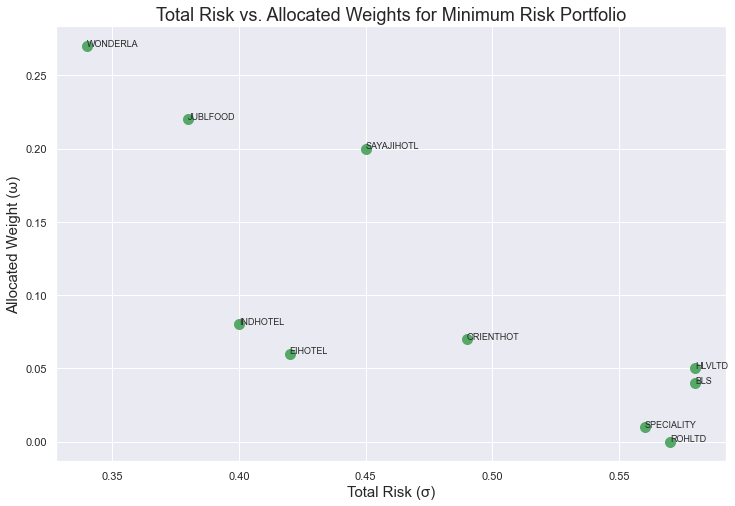

In [27]:
# Total Risks vs Optimised Weights chart

getRiskWeightPlot(optimised['x'])

Here, the task of generating optimised weights done by *scipy.optimize.minimize* of reducing the portfolio risk resulted into INDHOTEL, EIHOTEL and ORIENTHOT being given the weights of **8%, 6% and 7%** respectively considering their respective annualised volatility of **40%, 42% and 49%**.  
  
But, the stocks of Sayaji Hotels Ltd. are an anomaly here. SAYAJIHOTL has an annualised total risk of **45%** whereas it has been given weight of **20%**, which is the 3<sup>rd</sup> highest weight in the portfolio given to the stock.

Similarly, HLVLTD and BLS are given weights of **5%** and **4%** respectively compared to ROHLTD which has **0%** allocation, even after having higher risks (**58% each**) than ROHLTD which has **57%** annualised standard deviation.

----------------------
### Task 2: Without looking at the correlations of the securities, comment on what you expect the correlations of "counterintuitive" stocks to be relative to the alternatives.

SAYAJIHOTL seems to have a relatively lower correlation with the other portfolio stocks compared to correlation INDHOTEL, EIHOTEL and ORIENTHOT have to portfolio stocks. Also, HLVLTD and BLS seem to have a lower correlation to other stocks compared to ROHLTD. Why?

Assets having lower correlation (*ρ*) to the other assets in the portfolio result in lowering the portfolio risk. Similarly, there is a vice versa effect on portfolio risk for assets with stronger relationship to the other assets.  
In simple words,
> "***Stocks which move with one another increase the risk of the portfolio.***"  

> "***Stocks which move away from one another decrease the risk of the portfolio.***"

--------------------------
### Task 3: Create a correlation matrix which displays the correlations across all the securities you're working with. Modify the correlation matrix so it only displays data in the lower diagonal, with all values rounded off to 2 decimal places.

In [28]:
# Generating a 'correlation matrix' of the portfolio while displaying only the lower half

corr_port = df_returns.corr().round(2)

lower_triangle = np.tril(np.ones_like(corr_port, dtype = bool))
corr_port_low = corr_port.where(lower_triangle).fillna('')
print('Correlation (ρ) matrix of the portfolio')
corr_port_low

Correlation (ρ) matrix of the portfolio


,INDHOTEL,ORIENTHOT,SAYAJIHOTL,JUBLFOOD,EIHOTEL,SPECIALITY,ROHLTD,WONDERLA,HLVLTD,BLS
INDHOTEL,1.00,,,,,,,,,
ORIENTHOT,0.36,1.0,,,,,,,,
SAYAJIHOTL,0.07,0.11,1.0,,,,,,,
JUBLFOOD,0.32,0.14,0.06,1.0,,,,,,
EIHOTEL,0.48,0.37,0.11,0.27,1.0,,,,,
SPECIALITY,0.28,0.28,0.16,0.19,0.29,1.0,,,,
ROHLTD,0.39,0.37,0.1,0.22,0.43,0.31,1.0,,,
WONDERLA,0.32,0.21,0.07,0.23,0.3,0.26,0.29,1.0,,
HLVLTD,0.22,0.27,0.12,0.12,0.26,0.23,0.29,0.17,1.0,
BLS,0.18,0.19,0.11,0.15,0.19,0.23,0.21,0.23,0.21,1.0


-------------------------
### Task 4: Explore the correlations of the "counterintuitive" stocks against all other securities. Compare those correlations to those of the "alternative" securities.

--- **(a)** ---

In [29]:
task_4a = corr_port[['SAYAJIHOTL','INDHOTEL','EIHOTEL','ORIENTHOT']]
task_4a

,SAYAJIHOTL,INDHOTEL,EIHOTEL,ORIENTHOT
INDHOTEL,0.07,1.00,0.48,0.36
ORIENTHOT,0.11,0.36,0.37,1.00
SAYAJIHOTL,1.00,0.07,0.11,0.11
JUBLFOOD,0.06,0.32,0.27,0.14
EIHOTEL,0.11,0.48,1.00,0.37
SPECIALITY,0.16,0.28,0.29,0.28
ROHLTD,0.10,0.39,0.43,0.37
WONDERLA,0.07,0.32,0.30,0.21
HLVLTD,0.12,0.22,0.26,0.27
BLS,0.11,0.18,0.19,0.19


As we can observe above, SAYAJIHOTL has a lower correlation with other stocks in the portfolio, compared to INDHOTEL, EIHOTEL and ORIENTHOT. For example, let's examine their correlation with stocks 'SPECIALITY' and 'ROHLTD' :

In relation to SPECIALITY, SAYAJIHOTL has a relatively lower correlation (*ρ*) of **0.16**, compared to *ρ* of **0.28, 0.29 & 0.28** of INDHOTEL, EIHOTEL and ORIENTHOT respectively.

For ROHLTD too, *ρ* of SAYAJIHOTL is a low **0.10**, but INDHOTEL, EIHOTEL and ORIENTHOT have a higher *ρ* of **0.39, 0.43 & 0.37** respectively.

--- **(b)** ---

In [30]:
task_4b = corr_port[['HLVLTD','BLS','ROHLTD']]
task_4b

,HLVLTD,BLS,ROHLTD
INDHOTEL,0.22,0.18,0.39
ORIENTHOT,0.27,0.19,0.37
SAYAJIHOTL,0.12,0.11,0.10
JUBLFOOD,0.12,0.15,0.22
EIHOTEL,0.26,0.19,0.43
SPECIALITY,0.23,0.23,0.31
ROHLTD,0.29,0.21,1.00
WONDERLA,0.17,0.23,0.29
HLVLTD,1.00,0.21,0.29
BLS,0.21,1.00,0.21


It appears that ROHLTD generally has a higher correlation (*ρ*) with other stocks, compared to HLVLTD and BLS. For example,

With the INDHOTEL stock, ROHLTD has a correlation (*ρ*) of **0.39**, which is significantly higher compared to the *ρ* of **0.22** and **0.18** of HLVLTD and BLS respectively.

Similarly, in case of JUBLFOOD, the *ρ* is **0.12** and **0.15** with HLVLTD and BLS, compared to higher *ρ* of **0.22** with ROHLTD.

---------------------------
### Task 5: For each of the "counterintuitive" weight allocations you listed in Task 1, explain why those seemingly counterintuitive results are actually intuitive. Explain why those weights were allocated.

The seemingly 'counterintuitive' weight allocations to certain stocks (as seen in the 'Task 1') are a result of the lower correlation of these stocks (as seen in the 'Task 4'). And as explained in Task 2, lower the correlation (*ρ*) of an asset with other assets in the portfolio, lower the risk of a portfolio, and vice versa.
* SAYAJIHOTL had a lower correlation (*ρ*) with other stocks in the portfolio when compared to *ρ* of INDHOTEL, EIHOTEL and ORIENTHOT. Hence, SAYAJIHOTL had a portfolio weight (*ω*) of **20%** compared to **8%, 6% & 7%** of INDHOTEL, EIHOTEL and ORIENTHOT respectively.


* ROHLTD had a higher/stronger correlation (*ρ*) with other portfolio assets, compared to *ρ* of HLVLTD and BLS. And accordingly, the `minimize` function from *scipy.optimize* decided to NOT allocate portfolio weightings (*ω*) (**0% weight**) to the ROHLTD, but instead allocated **5%** & **4%** weights to HLVLTD and BLS respectively.